In [5]:
import numpy as np
import potential
reload(potential)
import matplotlib.pyplot as plt
%matplotlib inline

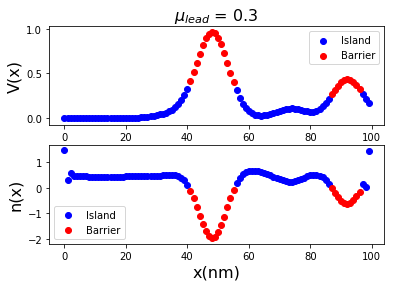

In [13]:
import potential
reload(potential)
import classify_tf
reload(classify_tf)

x = np.arange(100)
y = potential.init_ndot(x,5)

V = y
#V = np.array([0.5, 0.3,0.2, 0.5])
K = classify_tf.create_K_matrix(x,E_scale=0.1,sigma=(x[1] - x[0]))
#K = np.identity(len(x))
mu = 0.3
n = classify_tf.solve_thomas_fermi_fixed_mu(x,V,K,mu)


def classify_n(n,tol=1e-1):
    if n < 0:
        return 'b'
    else:
        return 'd'
mask = map(classify_n,n)

islands = np.where(n > 0)
barriers = np.where(n < 0)

fig,axarr = plt.subplots(2)
axarr[0].scatter(x[islands],V[islands],color='b')
axarr[0].scatter(x[barriers],V[barriers],color='r')
axarr[0].legend(('Island','Barrier'))
axarr[0].set_xlabel('x(nm)',fontsize=16)
axarr[0].set_ylabel('V(x)',fontsize=16)
axarr[0].set_title(r'$\mu_{lead}$ = ' + str(mu),fontsize=16)

ar = axarr[1].scatter(x[islands],n[islands],color='b')
ar = axarr[1].scatter(x[barriers],n[barriers],color='r')
axarr[1].legend(('Island','Barrier'))
axarr[1].set_xlabel('x(nm)',fontsize=16)
axarr[1].set_ylabel('n(x)',fontsize=16)


